# Versuch 1: Kalibrierung und Einsatz eines Infrarot-Entfernungsmessers
Dominik Bartsch, Stefan Ptacek, Niklas Kaiser

In [1]:
!python -m pip install numpy scipy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m

## Aufgabe 1: Ermittlung der Kennlinie des Abstandssensors

In [16]:
data = 0
vec = np.zeros((21, 3))

# Abstandswerte in cm
distance = np.array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70])
# Volt werte
volt = np.array([1.343, 1.2102, 1.050 , 0.974, 0.855, 0.790, 0.760, 0.698, 0.642, 0.603, 0.581, 0.563, 0.543, 0.466, 0.464, 0.447, 0.444, 0.447, 0.390, 0.380, 0.322])

[[1.00000000e+01 1.36778389e+00 2.22251743e-02]
 [1.30000000e+01 1.18078534e+00 2.25797209e-02]
 [1.60000000e+01 1.06928570e+00 2.01494387e-02]
 [1.90000000e+01 9.84961363e-01 1.88573724e-02]
 [2.20000000e+01 9.28133987e-01 1.95241487e-02]
 [2.50000000e+01 8.12611424e-01 2.37157183e-02]
 [2.80000000e+01 7.11166568e-01 2.14549814e-02]
 [3.10000000e+01 6.54343895e-01 1.76792292e-02]
 [3.40000000e+01 6.53330396e-01 1.81068693e-02]
 [3.70000000e+01 5.76829159e-01 2.31977447e-02]
 [4.00000000e+01 5.19287264e-01 1.96922110e-02]
 [4.30000000e+01 5.00869367e-01 2.23759563e-02]
 [4.60000000e+01 5.60748480e-01 1.87423681e-02]
 [4.90000000e+01 4.81649172e-01 2.28291789e-02]
 [5.20000000e+01 5.04674752e-01 2.11613388e-02]
 [5.50000000e+01 4.44085836e-01 2.41864832e-02]
 [5.80000000e+01 4.02558463e-01 2.37788875e-02]
 [6.10000000e+01 3.78419108e-01 1.93841252e-02]
 [6.40000000e+01 3.61526861e-01 2.20652260e-02]
 [6.70000000e+01 3.42110226e-01 2.30900336e-02]
 [7.00000000e+01 3.76187580e-01 2.339999

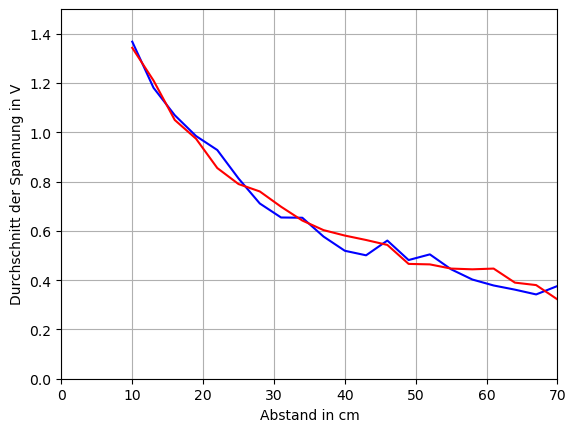

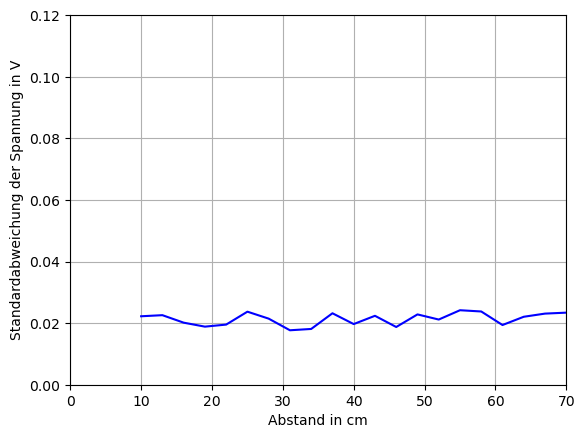

In [21]:
# For Schleife um die einzelnen Dateien einzulesen
for idx, x in enumerate(distance):
    # data sind die Werte aus den .csv Dateien. Mit rang[ten] werden die einzelnen Abstandswerte aus rang abgerufen
    
    #x.replace(',' '.').encode()
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Abstand in cm
    vec[idx, 0] = distance[idx]
    # Stelle 1: Durchschnitt der Spannung für einen bestimmten Abstand in cm
    vec[idx, 1] = np.mean(data)
    # Stelle 2: Standartabweichung der Spannung für einen bestimmten Abstand in cm
    vec[idx, 2] = np.std(data)

print(vec)

# Zeichnung des Graphen für den Durchschnitt der Spannung
plt.plot(distance, vec[:,1], 'b')
plt.plot(distance, volt, 'r')
plt.ylabel('Durchschnitt der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 1.5])
plt.grid(True)
plt.show()

# Zeichnung des Graphen für die Standartabweichung der Spannung
plt.plot(distance, vec[:,2], 'b')
plt.ylabel('Standardabweichung der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 0.12])
plt.grid(True)
plt.show()

## Aufgabe 2: Modellierung der Kennlinie durch lineare Regression

In [5]:
# leere Matrix für Messwerte
measurements = np.zeros((distance.size, 3))

# Daten aus Dateien auslesen
for idx, x in enumerate(distance):
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Logarithmus des Abstandes in cm
    measurements[idx, 0] = np.log(int(distance[idx]))
    # Stelle 1: Logarithmus des Durchschnittes der Spannung in Volt
    measurements[idx, 1] = np.log(np.mean(data))
    # Stelle 2: Logarithmus der Distanz in cm durch die Logarithmierung der Spannung in Volt
    measurements[idx, 2] = np.log(np.std(data)) / np.log(np.mean(data))

print(measurements)

[[ 2.30258509e+00  3.13191834e-01 -1.21539876e+01]
 [ 2.56494936e+00  1.66179764e-01 -2.28108585e+01]
 [ 2.77258872e+00  6.69908544e-02 -5.82852523e+01]
 [ 2.94443898e+00 -1.51528643e-02  2.62052855e+02]
 [ 3.09104245e+00 -7.45791739e-02  5.27775112e+01]
 [ 3.21887582e+00 -2.07502237e-01  1.80316959e+01]
 [ 3.33220451e+00 -3.40848604e-01  1.12712752e+01]
 [ 3.43398720e+00 -4.24122232e-01  9.51462695e+00]
 [ 3.52636052e+00 -4.25672311e-01  9.42383094e+00]
 [ 3.61091791e+00 -5.50209142e-01  6.84049015e+00]
 [ 3.68887945e+00 -6.55298055e-01  5.99350490e+00]
 [ 3.76120012e+00 -6.91409956e-01  5.49568059e+00]
 [ 3.82864140e+00 -5.78482817e-01  6.87482589e+00]
 [ 3.89182030e+00 -7.30539290e-01  5.17387064e+00]
 [ 3.95124372e+00 -6.83841113e-01  5.63812168e+00]
 [ 4.00733319e+00 -8.11737410e-01  4.58517902e+00]
 [ 4.06044301e+00 -9.09914944e-01  4.10912822e+00]
 [ 4.11087386e+00 -9.71752946e-01  4.05792527e+00]
 [ 4.15888308e+00 -1.01741894e+00  3.74845824e+00]
 [ 4.20469262e+00 -1.07262230e+

1. Logarithmierung der Eingangs- und Ausganswerte:


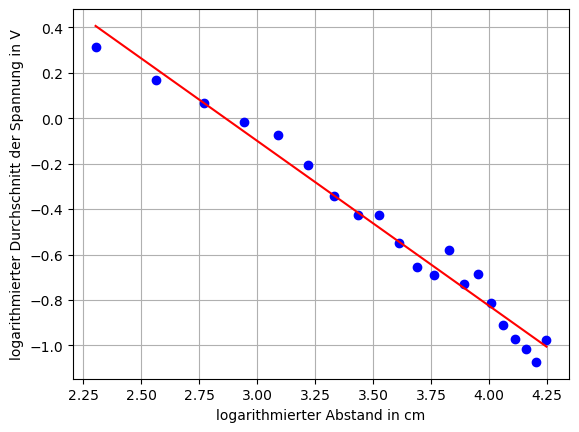

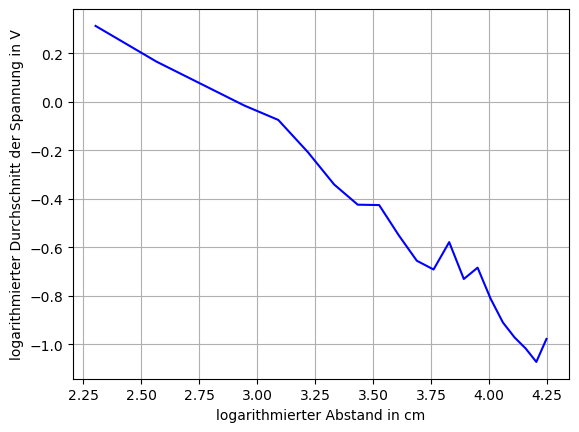

In [6]:
# Werte für lineare Regression
x = np.array(measurements[:,0])
y = np.array(measurements[:,1])
z = np.array(measurements[:,2])

mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

# Calculate the slope (m) and y-intercept (b) of the regression line
numerator = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x)])
denominator = sum([(x[i] - mean_x) ** 2 for i in range(len(x)])
m = numerator / denominator
b = mean_y - m * mean_x

# Predict a value
x_new = 6
y_pred = m * x_new + b

print("1. Logarithmierung der Eingangs- und Ausganswerte:")
# lineare Regression durchführen
gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
mn = np.min(x)
mx = np.max(x)
x1 = np.linspace(mn, mx, 500)
y1 = gradient * x1 + intercept

# Darstellung der Linearen Regression in einem Graphen
plt.plot(x, y, 'ob')
plt.plot(x1, y1, '-r')
plt.grid(True)
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.show()

# Darstellung der Kennlinie in einem Graphen
plt.plot(x, y, 'b')
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.grid(True)
plt.show()



### Aufgabe 3

In [7]:
data = 0
data2 = 0
faktor2 = 1.96

# data sind die Werte aus der (21cm) breiten DinA4 Seite in die .csv Datei gespeichert wurden.
kurz = np.genfromtxt('messungA3/dinA4-kurz.csv', delimiter=";", skip_header=1000, skip_footer=500,
                     usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

# data2 sind die Werte aus der (29,7cm) langen DinA4 Seite in die .csv Datei gespeichert wurden.
lang = np.genfromtxt('messungA3/dinA4-lang.csv', delimiter=";", skip_header=1000, skip_footer=500,
                      usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

# Standartabweichung und Average ausrechnen aufgrund der Gaußverteilung mit 2sx und 4sx
avglang = np.mean(lang)
stdlang = np.std(lang) / np.sqrt(1000)
avgkurz = np.mean(kurz)
stdkurz = np.std(kurz) / np.sqrt(1000)

result1 = avglang + 1 * stdlang * 2
result2 = avglang + 1.96 * stdlang * 4

result3 = avgkurz + 1 * stdkurz * 2
result4 = avgkurz + 1.96 * stdkurz * 4

# LaTeX Format für Tabellen um die Tabelle automatisch generieren zu lassen mittels der For Schleife

print("lang")
print(str(np.mean(lang)))

print("x(68%) = " + str(avglang) + " V + " + "1 * " + str(stdlang) + " V * 2 = " + str(result1.round(3)))
print("x(95%) = " + str(avglang) + " V + " + "1,96 * " + str(stdlang) + " V * 4 = " + str(result2.round(3)))
print()

print("kurz")
print(str(np.mean(kurz)))

print("x(68%) = " + str(avgkurz) + " V + " + "1 * " + str(stdkurz) + " V * 2 = " + str(result3.round(3)))
print("x(95%) = " + str(avgkurz) + " V + " + "1,96 * " + str(stdkurz) + " V * 4 = " + str(result4.round(3)))
print()

# Funktionen zur Berechnung
a1 = np.log(29.7) / np.log(np.mean(lang))
b1 = np.log(29.7) - (a1 * np.log(np.mean(lang)))
z1 = (np.exp(b1) * a1 * np.mean(lang) ** (a1 - 1))

# Gaußverteilung mit 68,26% und 95%
# Korrekturfaktor = 1,0 und 1,96
korrektur_lang = (np.mean(lang) + faktor2 * stdlang) - np.mean(lang)
deltaya68 = z1 * stdlang
deltaya95 = z1 * korrektur_lang

# e^b * x^a  -  Umkehrung der doppelten Logarithmierung
y1 = np.exp(b1) * np.power(np.mean(lang), a1)

# Ausgeben der errechneten Messkorrekturen für die jeweilige Gaußverteilung
print("Ergebnisse für die lange Seite")
print("y(68%) = " + str(round(y1, 2)) + " cm +-" + str((deltaya68 * -1).round(3)) + " cm")
print("y(95%) = " + str(round(y1, 2)) + " cm +-" + str((deltaya95 * -1).round(3)) + " cm")

# Berechnung von 21 cm Messfehler #
a2 = np.log(21) / np.log(np.mean(kurz))
b2 = np.log(21) - (a2 * np.log(np.mean(kurz)))
z2 = (np.exp(b2) * a2 * np.mean(kurz) ** (a2 - 1))

# Gaußverteilung mit 68,26% und 95%
# Korrekturfaktor = 1,0 und 1,96
korrektur_kurz = (np.mean(kurz) + faktor2 * stdkurz) - np.mean(kurz)
deltayb68 = z2 * stdkurz
deltayb95 = z2 * korrektur_kurz

# e^b * x^a  -  Umkehrung der doppelten Logarithmierung
y2 = np.exp(b2) * np.power(np.mean(kurz), a2)

# Errechnung des Flächeninhalts
flache = round(y2, 2) * round(y1, 2)
# Ausgeben der errechneten Messkorrekturen für die jeweilige Gaußverteilung
print("y(68%) = " + str(round(y2, 2)) + " cm +-" + str((deltayb68 * -1).round(3)) + " cm")
print("y(95%) = " + str(round(y2, 2)) + " cm +-" + str((deltayb95 * -1).round(3)) + " cm")
print()

print("Ein DinA4 Blatt hat ein Flächeninhalt von " + str(round(flache, 2)) + " cm^2")
print("68% hat bei einem Flächeninhalt von " + str(round(flache, 2)) + "cm^2 einen Messfehler von +" + str(
    (deltaya68 + deltayb68).round(3)) + "cm")
print("95% hat bei einem Flächeninhalt von " + str(round(flache, 2)) + "cm^2 einen Messfehler von +" + str(
    (deltaya95 + deltayb95).round(3)) + "cm")

lang
0.7098321200790189
x(68%) = 0.7098321200790189 V + 1 * 0.0006700726399145363 V * 2 = 0.711
x(95%) = 0.7098321200790189 V + 1,96 * 0.0006700726399145363 V * 4 = 0.715

kurz
0.9088772273660747
x(68%) = 0.9088772273660747 V + 1 * 0.0007637161882905037 V * 2 = 0.91
x(95%) = 0.9088772273660747 V + 1,96 * 0.0007637161882905037 V * 4 = 0.915

Ergebnisse für die lange Seite
y(68%) = 29.7 cm +-0.277 cm
y(95%) = 29.7 cm +-0.544 cm
y(68%) = 21.0 cm +-0.562 cm
y(95%) = 21.0 cm +-1.102 cm

Ein DinA4 Blatt hat ein Flächeninhalt von 623.7 cm^2
68% hat bei einem Flächeninhalt von 623.7cm^2 einen Messfehler von +-0.84cm
95% hat bei einem Flächeninhalt von 623.7cm^2 einen Messfehler von +-1.646cm
